In [11]:
!pip install pandas
!pip install matplotlib


You should consider upgrading via the 'c:\users\yashm\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\yashm\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [12]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def fetch_data_from_api():
    url = 'https://api-v2.upstox.com/historical-candle/NSE_EQ%7CINE002A01018/1minute/2023-08-27'
    headers = {'Content-Type': 'text/html', 'Api-Version': '2.0'}
    res = requests.get(url, headers=headers)
    response = json.loads(res.text)
    df = pd.DataFrame(response['data']['candles'], columns=['Date', 'open', 'low', 'high', 'close', 'volume', 'dummy'])
    df = df.drop(df.columns[-1], axis=1)
    return df

In [14]:
stock_price_df = fetch_data_from_api()
stock_price_df

,Date,open,low,high,close,volume
0,2023-08-25T15:29:00+05:30,2460.35,2462.00,2459.95,2461.00,31998
1,2023-08-25T15:28:00+05:30,2460.00,2460.90,2460.00,2460.45,18638
2,2023-08-25T15:27:00+05:30,2460.35,2460.35,2459.95,2460.10,44923
3,2023-08-25T15:26:00+05:30,2461.70,2461.70,2460.10,2460.40,45034
4,2023-08-25T15:25:00+05:30,2461.95,2463.00,2461.55,2461.65,23335
...,...,...,...,...,...,...
1870,2023-08-21T09:19:00+05:30,2553.70,2554.55,2548.00,2549.00,26765
1871,2023-08-21T09:18:00+05:30,2548.00,2555.10,2548.00,2553.90,63078
1872,2023-08-21T09:17:00+05:30,2540.00,2549.00,2539.35,2548.00,43782
1873,2023-08-21T09:16:00+05:30,2542.75,2543.00,2536.35,2540.00,45731


In [15]:
# Moving Average
def MA(df, n):
    MA = pd.Series(df['close'].rolling(n).mean(), name = 'MA_' + str(n))
    df = df.join(MA)
    return df

MOVING AVERAGE


<Axes: >

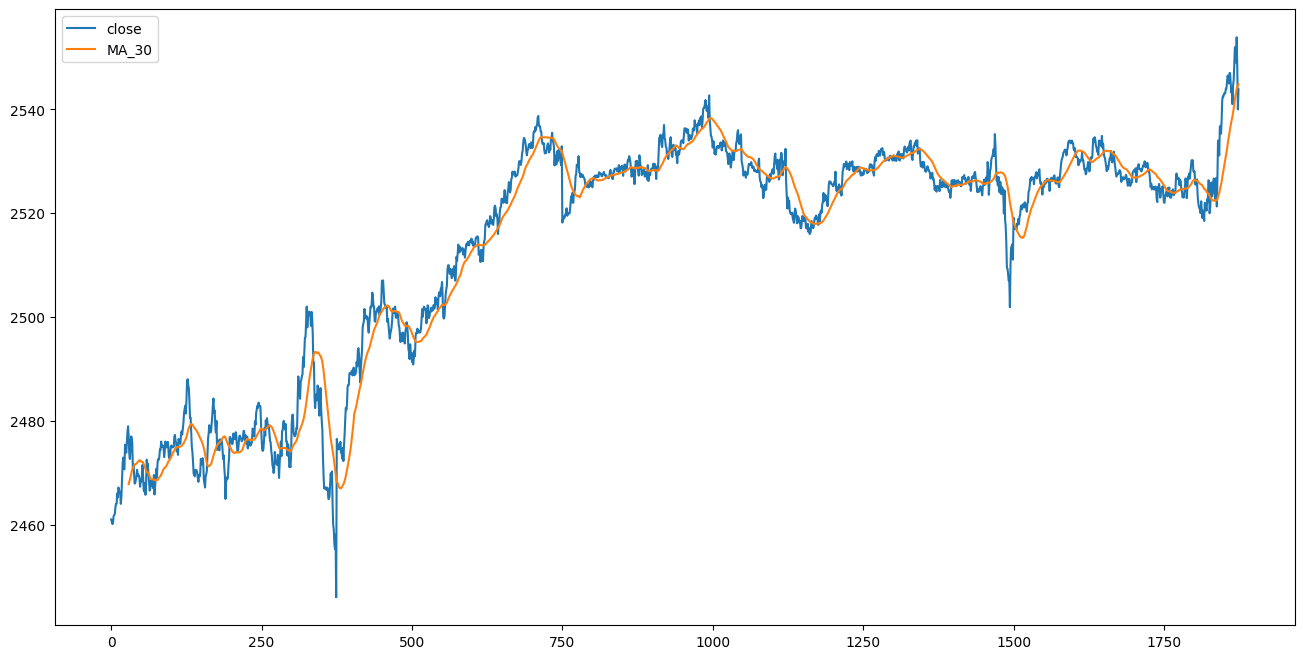

In [16]:
# Printing the Moving Average
print("MOVING AVERAGE")
stock_ma_df = MA(stock_price_df, 30)
# print(stock_ma_df)

plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline
  
stock_ma_df[['close', 'MA_30']].plot(
  label='Reliance', figsize=(16, 8))